In [34]:
import pandas as pd

In [35]:
data = pd.read_csv('2315676.txt', na_values = -9999, sep='\s+', parse_dates=["DATE"], date_format='%Y%m%d', index_col=["DATE"], skiprows=[1])

In [36]:
data.head()

,STATION,STATION_NAME,TAVG,TMAX,TMIN
DATE,,,,,
1908-01-01,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,2.0,-37.0
1908-01-02,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,6.0,-26.0
1908-01-03,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,7.0,-27.0
1908-01-04,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,-3.0,-27.0
1908-01-05,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,4.0,-36.0


In [37]:
data['TAVG_EPS'] = data['TAVG'].fillna((data['TMAX'] + data['TMIN'])/2)

In [38]:
# Напишите функцию fahr_to_celsius для конвертации температуры. Затем используйте метод apply для каждой из трёх колонок с температурой, 
#передав в качестве аргумента вашу функцию. Присвойте результат выполнения этого метода трём новым колонкам.

def fahr_to_celsius(temp):
    temp = (temp - 32)/1.8
    return temp

# конвертация в Цельсии
data['TAVG_Celsius'] = data['TAVG_EPS'].apply(fahr_to_celsius)
data['TMAX_Celsius'] = data['TMAX'].apply(fahr_to_celsius)
data['TMIN'] = data['TMIN'].apply(fahr_to_celsius)

In [39]:
data.head()

,STATION,STATION_NAME,TAVG,TMAX,TMIN,TAVG_EPS,TAVG_Celsius,TMAX_Celsius
DATE,,,,,,,,
1908-01-01,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,2.0,-38.333333,-17.5,-27.500000,-16.666667
1908-01-02,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,6.0,-32.222222,-10.0,-23.333333,-14.444444
1908-01-03,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,7.0,-32.777778,-10.0,-23.333333,-13.888889
1908-01-04,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,-3.0,-32.777778,-15.0,-26.111111,-19.444444
1908-01-05,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,4.0,-37.777778,-16.0,-26.666667,-15.555556


In [40]:
# Выбираем данные за 2003 год
#data_2003 = data.loc[((data["DATE"] >= 20021201) & (data["DATE"] <= 20031231))]
#subset = data.loc[(data.index >= "20021201") & (data.index <= "20031231")]
#data.index = pd.to_datetime(data.index, format='%Y%m%d')

temps_winter = data.loc[((data.index >= '20021201') & (data.index <= '20031231'))]
temps_sping = data.loc[((data.index >= '20030301') & (data.index <= '20030531'))]
temps_summer = data.loc[((data.index >= '20030601') & (data.index <= '20030831'))]
temps_autumn = data.loc[((data.index >= '20030901') & (data.index <= '20031130'))]

#data_2003.loc[((data_2003['DATE']>=20021201) & (data_2003['DATE']<=20030228))]
#temps_winter['DATE']=pd.to_datetime(temps_winter['DATE'], format='%Y%m%d')
#temps_winter

In [42]:
avg_winter = temps_winter['TAVG_Celsius'].mean()
avg_sping = temps_sping['TAVG_Celsius'].mean().round()
avg_summer = temps_summer['TAVG_Celsius'].mean().round()
avg_autumn = temps_autumn['TAVG_Celsius'].mean().round()

print(f"Средняя зимняя температура в 2003 году: {avg_winter:2.0f}")
print(f"Средняя весенняя температура в 2003 году: {avg_sping:2.0f}")
print(f"Средняя летняя температура в 2003 году: {avg_summer:2.0f}")
print(f"Средняя осенняя температура в 2003 году: {avg_autumn:2.0f}")

Средняя зимняя температура в 2003 году: -1
Средняя весенняя температура в 2003 году:  1
Средняя летняя температура в 2003 году: 14
Средняя осенняя температура в 2003 году:  1


In [43]:
import matplotlib.pyplot as plt

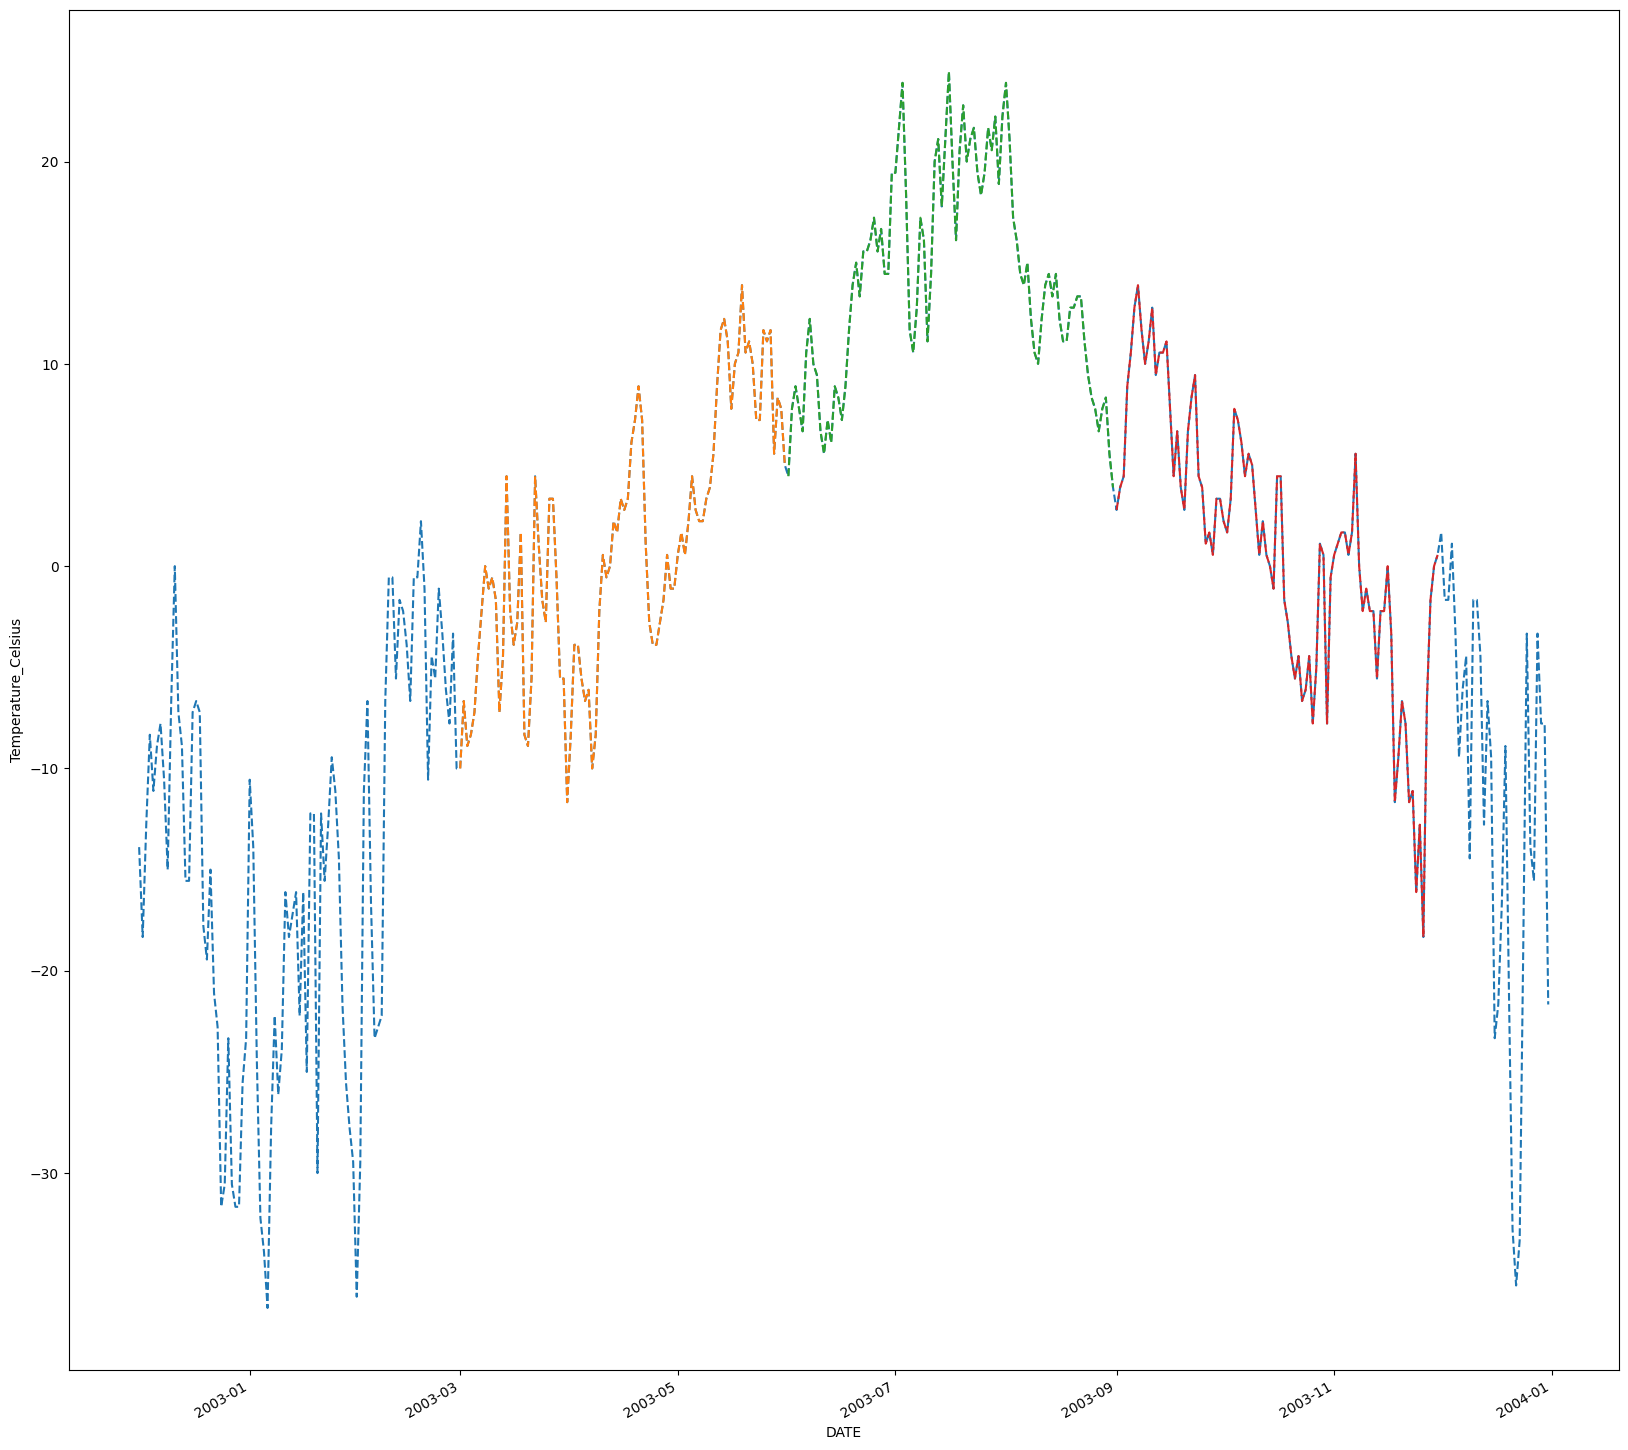

In [53]:
fig, ax = plt.subplots(figsize = (20,20))
#plt.plot(temps_winter['DATE'],temps_winter['TAVG_Celsius'])
#plt.title('Winter')

temps_winter.TAVG_Celsius.plot(ylabel = 'Temperature_Celsius', xlabel = 'DATE')
temps_sping.TAVG_Celsius.plot()
temps_summer.TAVG_Celsius.plot()
temps_autumn.TAVG_Celsius.plot()
plt.rcParams['lines.linestyle'] = '--'